In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import system libs
import os
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input
from tensorflow.keras import layers, models
print ('modules loaded')

modules loaded


### *Read data and store it in dataframe*

In [5]:
# Generate data paths with labels
train_data_dir = '/content/drive/MyDrive/project deeplearning 12/archive (2)/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# print(labels)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [6]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/project deeplearning 12...,glioma
1,/content/drive/MyDrive/project deeplearning 12...,glioma
2,/content/drive/MyDrive/project deeplearning 12...,glioma
3,/content/drive/MyDrive/project deeplearning 12...,glioma
4,/content/drive/MyDrive/project deeplearning 12...,glioma
...,...,...
5707,/content/drive/MyDrive/project deeplearning 12...,meningioma
5708,/content/drive/MyDrive/project deeplearning 12...,meningioma
5709,/content/drive/MyDrive/project deeplearning 12...,meningioma
5710,/content/drive/MyDrive/project deeplearning 12...,meningioma


In [7]:
# Generate data paths with labels
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset
# data_dir = '/content/drive/MyDrive/project deeplearning 12'  # Replace with your path
test_data_dir = '/content/drive/MyDrive/project deeplearning 12/archive (2)/Testing' # Define test_data_dir

filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ts_df

,filepaths,labels
0,/content/drive/MyDrive/project deeplearning 12...,glioma
1,/content/drive/MyDrive/project deeplearning 12...,glioma
2,/content/drive/MyDrive/project deeplearning 12...,glioma
3,/content/drive/MyDrive/project deeplearning 12...,glioma
4,/content/drive/MyDrive/project deeplearning 12...,glioma
...,...,...
1306,/content/drive/MyDrive/project deeplearning 12...,pituitary
1307,/content/drive/MyDrive/project deeplearning 12...,pituitary
1308,/content/drive/MyDrive/project deeplearning 12...,pituitary
1309,/content/drive/MyDrive/project deeplearning 12...,pituitary


### *Split dataframe into train, valid, and test*

In [9]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.50, shuffle= True, random_state= 123)

In [10]:
test_df

,filepaths,labels
569,/content/drive/MyDrive/project deeplearning 12...,notumor
822,/content/drive/MyDrive/project deeplearning 12...,meningioma
1056,/content/drive/MyDrive/project deeplearning 12...,pituitary
84,/content/drive/MyDrive/project deeplearning 12...,glioma
560,/content/drive/MyDrive/project deeplearning 12...,notumor
...,...,...
692,/content/drive/MyDrive/project deeplearning 12...,notumor
1032,/content/drive/MyDrive/project deeplearning 12...,pituitary
1044,/content/drive/MyDrive/project deeplearning 12...,pituitary
237,/content/drive/MyDrive/project deeplearning 12...,glioma


### *Create image data generator*

In [11]:
# crobed image size
batch_size = 35
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


### *Data augmentation for glioma class*

In [12]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/project deeplearning 12'

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation in the range [0, 20] degrees
    width_shift_range=0.2,  # Random horizontal shift by up to 20% of the image width
    height_shift_range=0.2, # Random vertical shift by up to 20% of the image height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Random zoom by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill points outside the boundaries with the nearest pixel value
)

# Get the list of all image files in the specified directory, excluding directories
image_files = [
    os.path.join(dataset_path, img)
    for img in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, img)) # Check if it's a file
]

# Generate augmented images for each image file
for img_path in image_files:
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Generate augmented images
    augmented_images = []
    for batch in datagen.flow(img_array, batch_size=5):
        augmented_images.append(batch[0].astype('uint8'))
        if len(augmented_images) >= 10:  # Generate 10 augmented images
            break

# Continue with your code or analysis without displaying the augmented images

### *Data augmentation for meningioma class*

In [13]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/project deeplearning 12'

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Get the list of all image files in the specified directory, excluding directories
image_files = [
    os.path.join(dataset_path, img)
    for img in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, img)) # Check if it's a file
]

# Generate augmented images for each image file
for img_path in image_files:
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Generate augmented images
    augmented_images = []
    for batch in datagen.flow(img_array, batch_size=5):
        augmented_images.append(batch[0].astype('uint8'))
        if len(augmented_images) >= 10:  # Generate 10 augmented images
            break

# Continue with your code or analysis without displaying the augmented images

### *Data augmentation for notumor class*

In [14]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/project deeplearning 12'

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation in the range [0, 20] degrees
    width_shift_range=0.2,  # Random horizontal shift by up to 20% of the image width
    height_shift_range=0.2, # Random vertical shift by up to 20% of the image height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Random zoom by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill points outside the boundaries with the nearest pixel value
)

# Get the list of all image files in the specified directory
image_files = [
    os.path.join(dataset_path, img)
    for img in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, img)) # Check if it's a file
]
# Generate augmented images for each image file
for img_path in image_files:
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Generate augmented images
    augmented_images = []
    for batch in datagen.flow(img_array, batch_size=5):
        augmented_images.append(batch[0].astype('uint8'))
        if len(augmented_images) >= 10:  # Generate 10 augmented images
            break

# Continue with your code or analysis without displaying the augmented images

### *Data augmentation for pituitary class*

In [15]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/project deeplearning 12'

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation in the range [0, 20] degrees
    width_shift_range=0.2,  # Random horizontal shift by up to 20% of the image width
    height_shift_range=0.2, # Random vertical shift by up to 20% of the image height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Random zoom by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill points outside the boundaries with the nearest pixel value
)

# Get the list of all image files in the specified directory, excluding directories
image_files = [
    os.path.join(dataset_path, img)
    for img in os.listdir(dataset_path)
    if os.path.isfile(os.path.join(dataset_path, img)) and img.lower().endswith(('.png', '.jpg', '.jpeg')) # Check if it's a file and has a valid image extension
]

# Generate augmented images for each image file
for img_path in image_files:
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Generate augmented images
    augmented_images = []
    for batch in datagen.flow(img_array, batch_size=5):
        augmented_images.append(batch[0].astype('uint8'))
        if len(augmented_images) >= 10:  # Generate 10 augmented images
            break

# Continue with your code or analysis without displaying the augmented images

### *Show number of images after augmentation*

In [16]:
# Count the total number of images (original + augmented)
total_images = len(image_files) * 10 # Assuming 10 augmented images per original image

print(f'Total number of images in the training path: {total_images}')

Total number of images in the training path: 0


### *Show sample from train data*

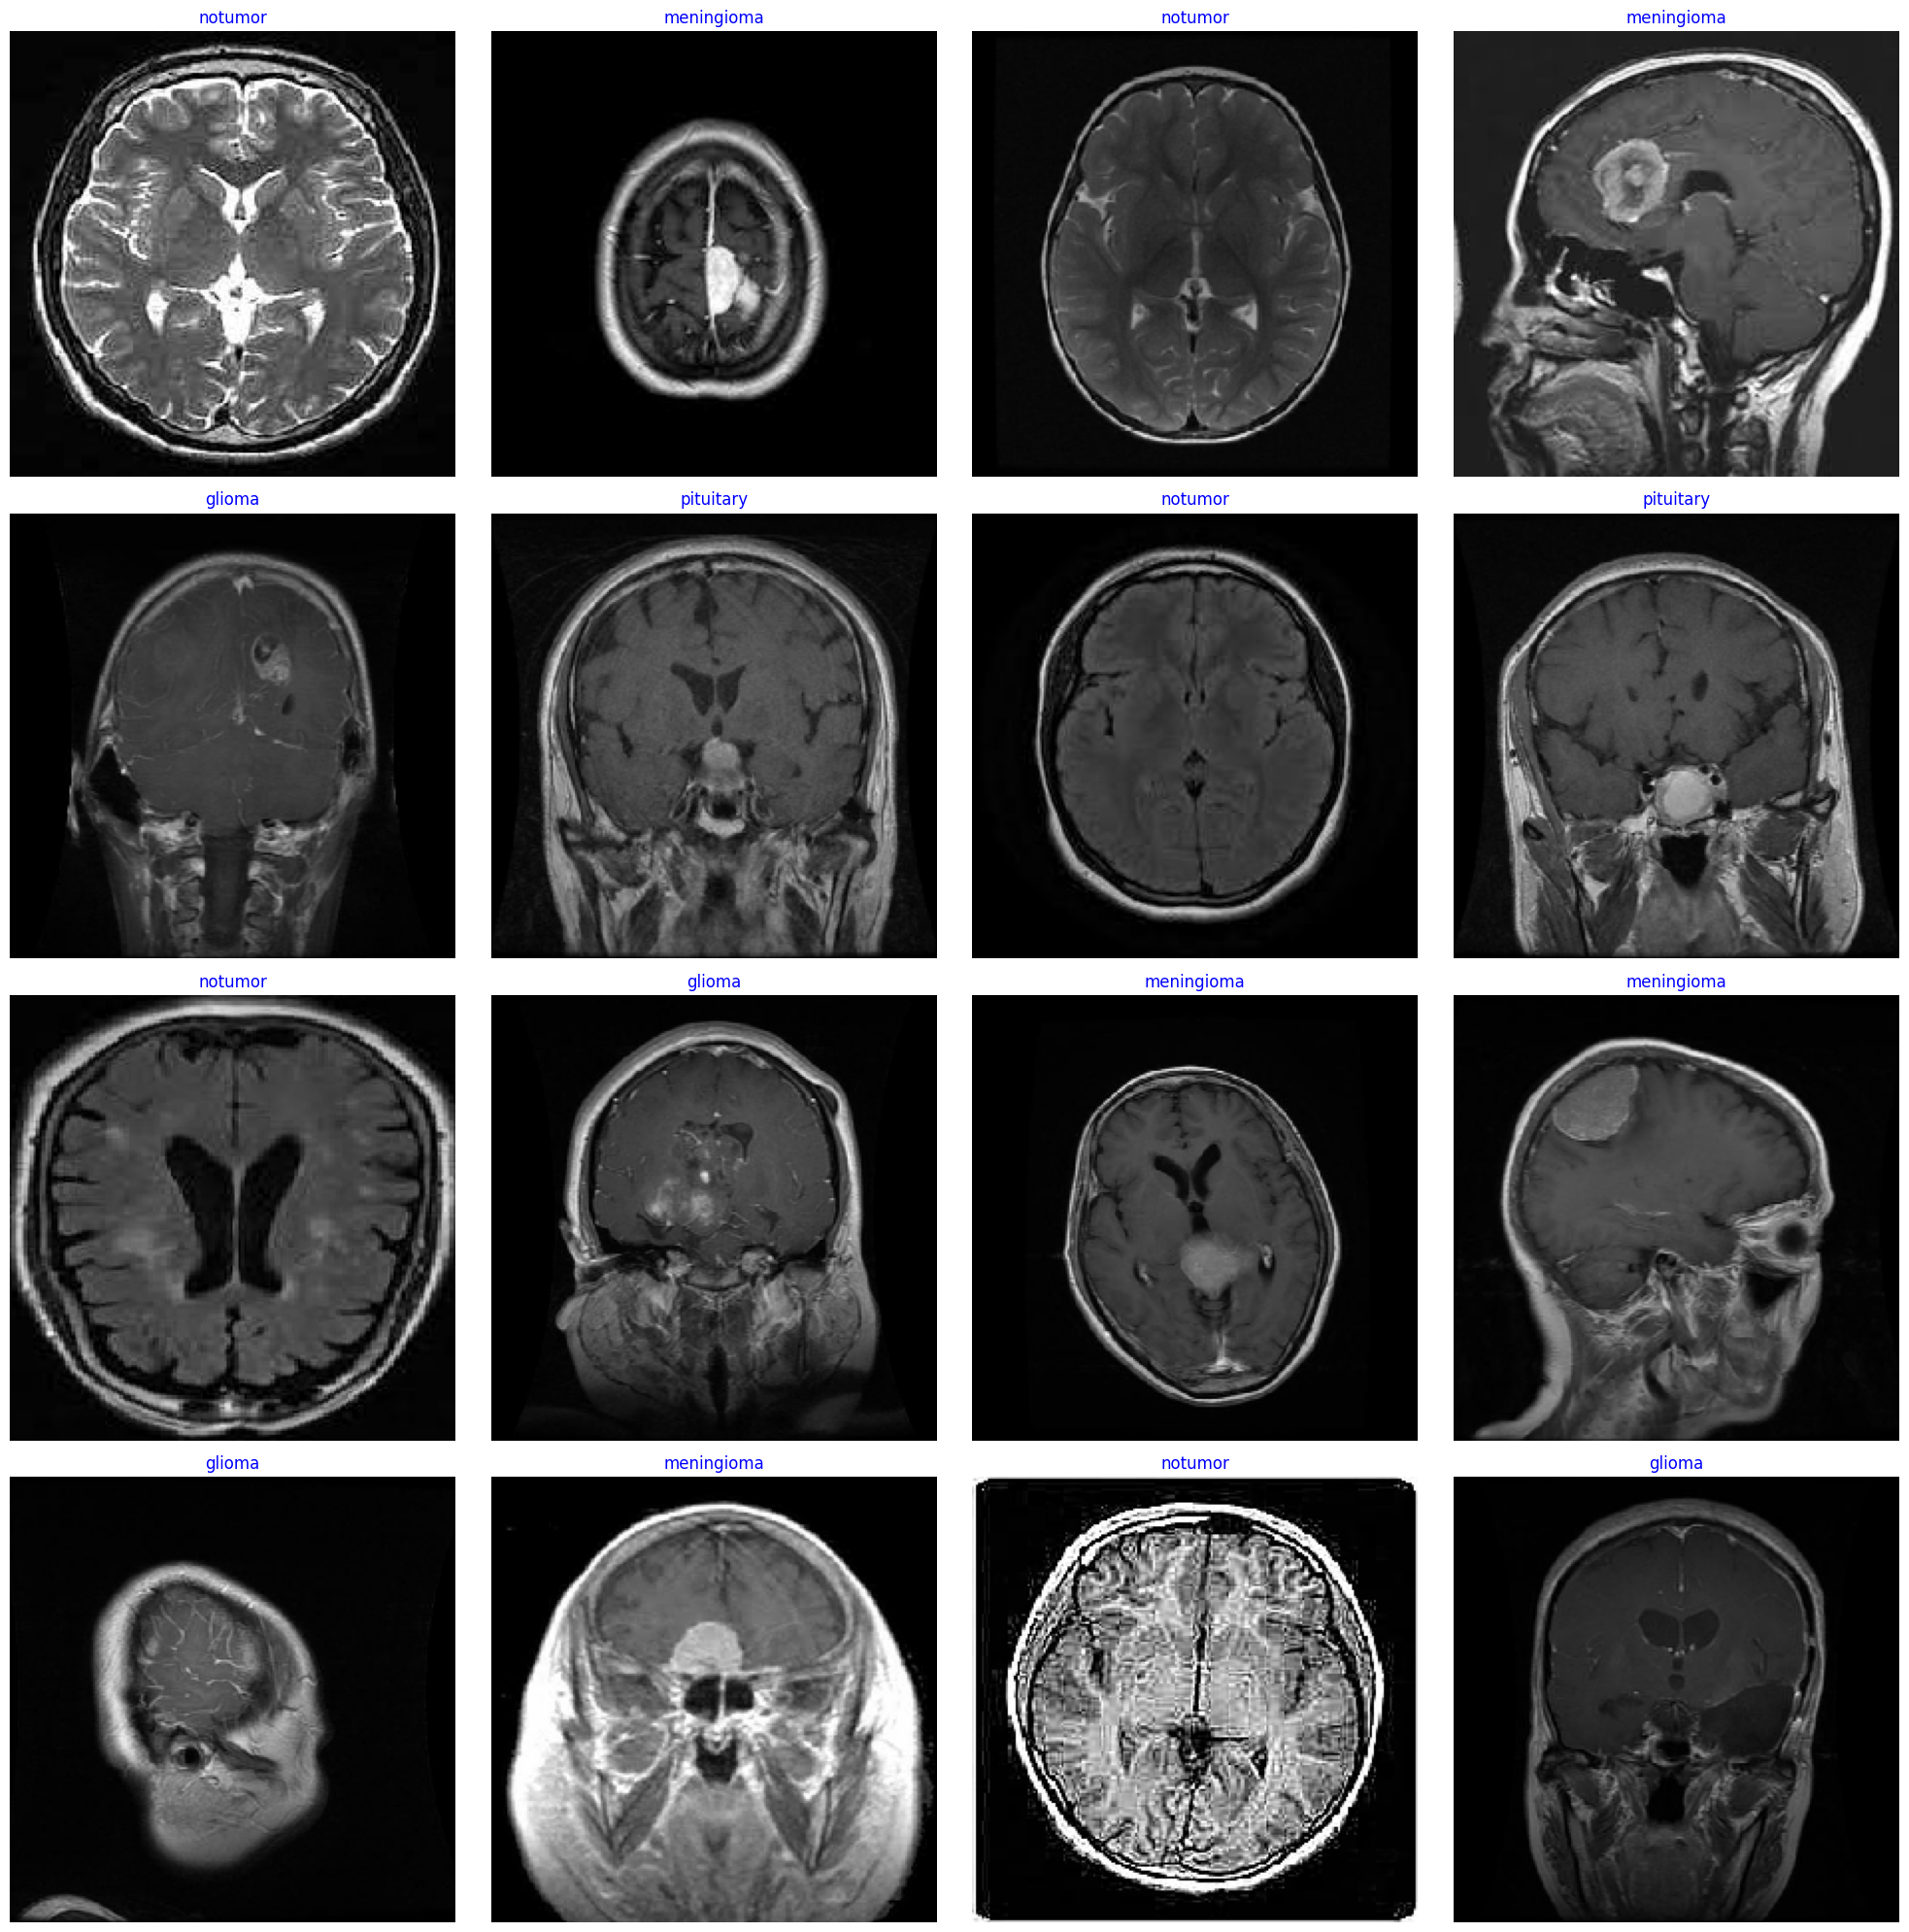

In [17]:

g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# *Model Structure*

#### *Generic Model Creation*

In [18]:
from tensorflow.keras.regularizers import l2

In [19]:
# crobed image size
batch_size = 32
img_size = (224, 224,3)
channels = 3
img_shape = (224, 224, 3)  # تأكد من أن الأبعاد مطابقة لمتطلبات EfficientNetB3.
class_count = len(train_gen.class_indices)  # تأكد من أن هذا العدد يطابق عدد الفئات.

#Creat Pre_traind modle
# We use the EfficientNetB3 from EfficientNet family
base_modle=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False , weights='imagenet' , input_shape=img_shape , pooling='max')
model = Sequential([
   base_modle,
    BatchNormalization(),
    Dense(256,activation='relu'),
    Dropout(rate=0.45,seed=123),
    Dense(class_count,activation='softmax')
])

Learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)

Optimizer = Adamax(learning_rate=Learning_rate_schedule)




model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,184,179 (42.66 MB)

 Trainable params: 11,093,804 (42.32 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [20]:
epochs = 30  # number of all epochs in training


history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,validation_steps=None ,shuffle= False)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 1837s 10s/step - accuracy: 0.8101 - auc: 0.9467 - loss: 0.5953 - recall: 0.7972 - val_accuracy: 0.9176 - val_auc: 0.9863 - val_loss: 0.2934 - val_recall: 0.9099
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 48s 292ms/step - accuracy: 0.9701 - auc: 0.9979 - loss: 0.0903 - recall: 0.9664 - val_accuracy: 0.8718 - val_auc: 0.9789 - val_loss: 0.3697 - val_recall: 0.8626
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 305ms/step - accuracy: 0.9758 - auc: 0.9984 - loss: 0.0639 - recall: 0.9750 - val_accuracy: 0.9710 - val_auc: 0.9980 - val_loss: 0.0917 - val_recall: 0.9664
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 304ms/step - accuracy: 0.9859 - auc: 0.9994 - loss: 0.0413 - recall: 0.9857 - val_accuracy: 0.9893 - val_auc: 0.9967 - val_loss: 0.0540 - val_recall: 0.9893
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 305ms/step - accuracy: 0.9906 - auc: 0.9995 - loss: 0.0302 - recall: 0.9897 - val_accuracy: 0.9893 - val_auc: 0.9968 - val_loss: 0.0513 - val_recall: 0.9893
Epoch 

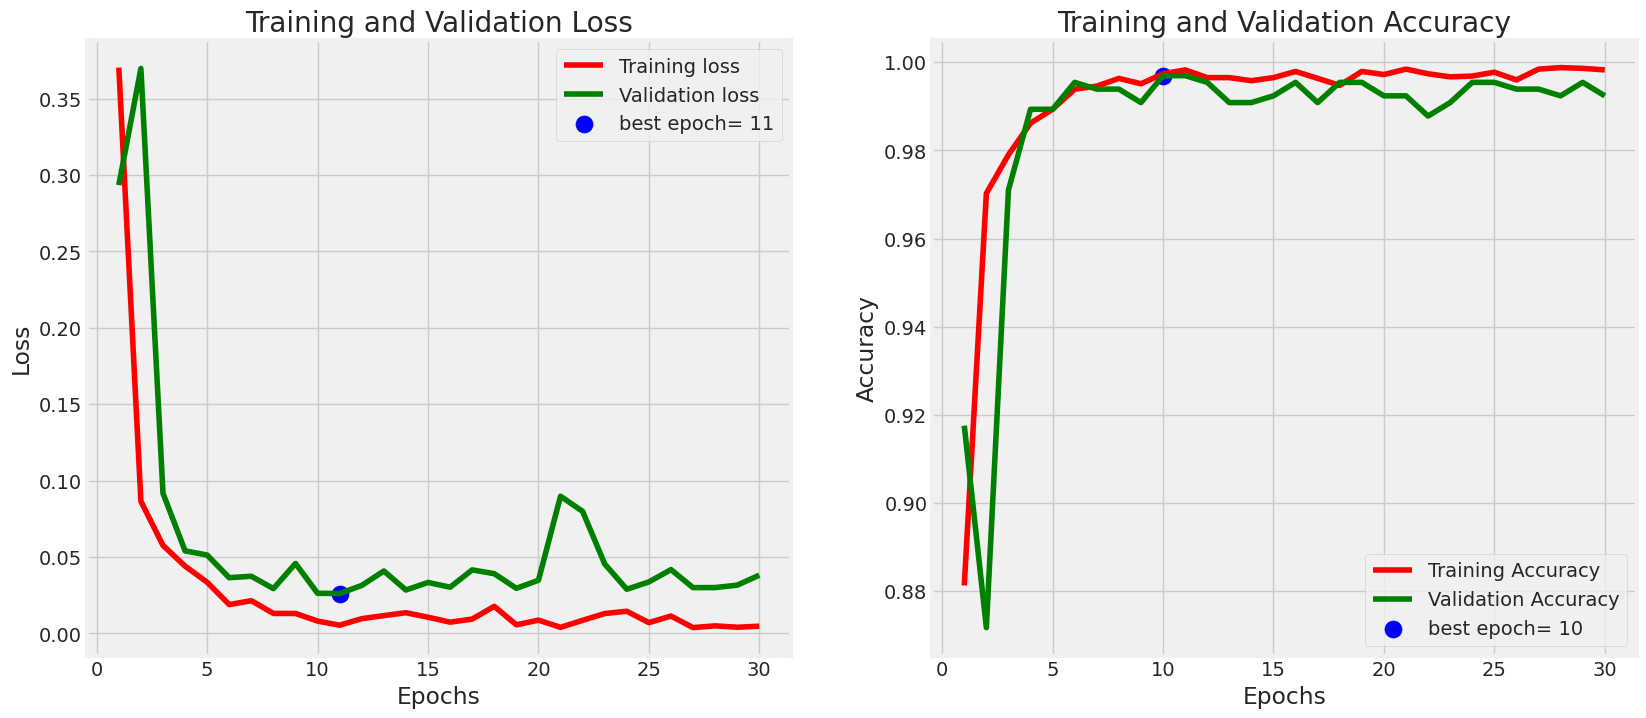

In [21]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [22]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

164/164 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 6.4033e-06 - recall: 1.0000
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.9920 - auc: 0.9958 - loss: 0.0443 - recall: 0.9920


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 212s 12s/step - accuracy: 0.9995 - auc: 1.0000 - loss: 0.0018 - recall: 0.9995
Train Loss:  3.667796818263014e-06
Train Accuracy:  1.0
--------------------
Validation Loss:  0.03812125697731972
Validation Accuracy:  0.9923664331436157
--------------------
Test Loss:  0.005182938650250435
Test Accuracy:  0.9984756112098694


In [23]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 724ms/step


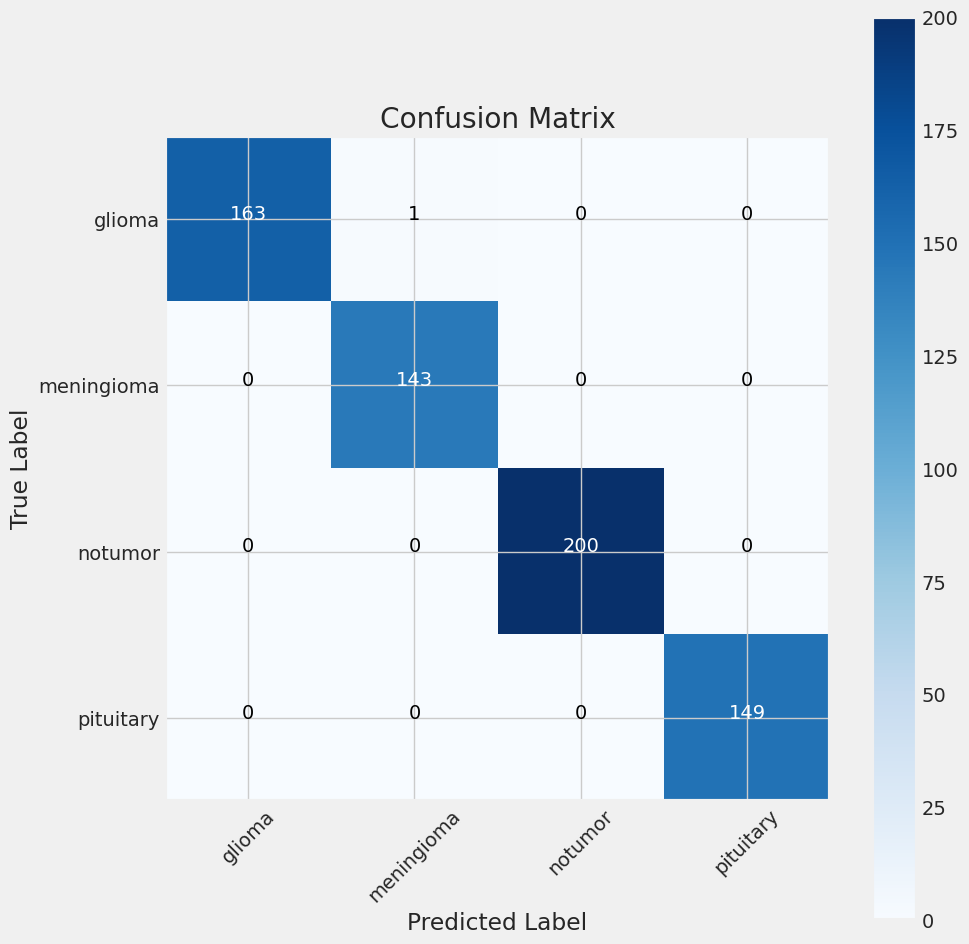

In [24]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [25]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       1.00      0.99      1.00       164
  meningioma       0.99      1.00      1.00       143
     notumor       1.00      1.00      1.00       200
   pituitary       1.00      1.00      1.00       149

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



In [26]:
#Save the model
model.save('Brain Tumors.h5')

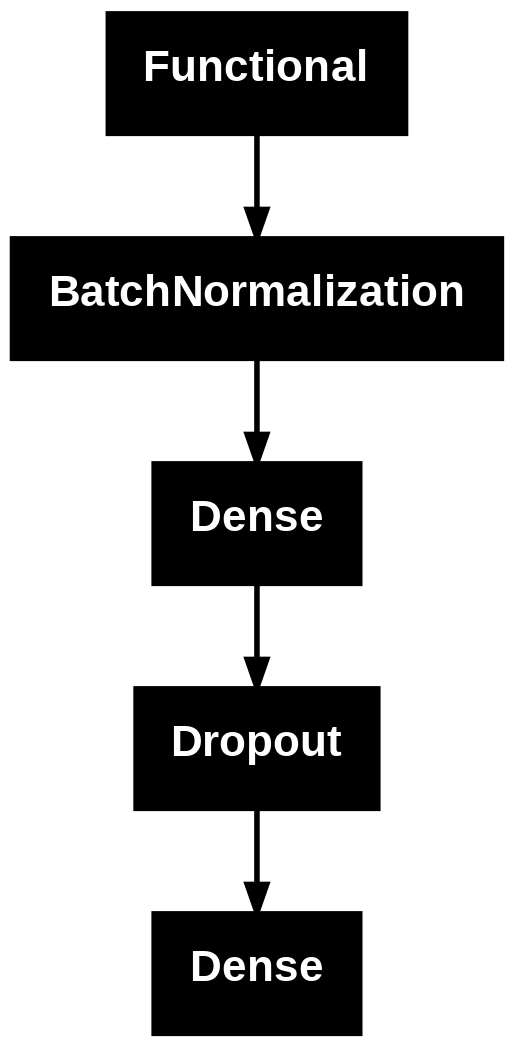

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model)